In [32]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
import pickle
import cv2

In [33]:
(xtr,ytr),(xte,yte) = tf.keras.datasets.cifar10.load_data()
xtr = xtr/255.0
xte = xte/255.0

In [34]:
print('Training Set: X=%s, y=%s' % (xtr.shape, ytr.shape))
print('Test: X=%s, y=%s' % (xte.shape, yte.shape))

Training Set: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


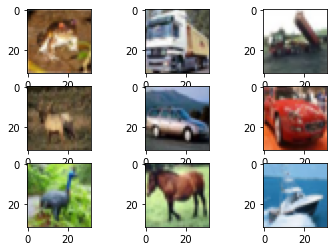

In [35]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(xtr[i], cmap=plt.get_cmap('gray'))
plt.show()

In [36]:
cifar10_model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [37]:
cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [38]:
cifar10_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = cifar10_model.fit(xtr,ytr,validation_data=(xte, yte), epochs=15,batch_size=32)

Epoch 1/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8731 - accuracy: 0.3220 - val_loss: 1.6956 - val_accuracy: 0.3977
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6873 - accuracy: 0.3934 - val_loss: 1.6113 - val_accuracy: 0.4229
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6076 - accuracy: 0.4240 - val_loss: 1.5729 - val_accuracy: 0.4423
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5552 - accuracy: 0.4421 - val_loss: 1.5534 - val_accuracy: 0.4457
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5209 - accuracy: 0.4566 - val_loss: 1.5158 - val_accuracy: 0.4566
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4862 - accuracy: 0.4689 - val_loss: 1.5101 - val_accuracy: 0.4618
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4650 - accuracy: 0.4769 - val_loss: 1.5215 - val_accuracy:

In [40]:
cifar10_model.evaluate(xtr, ytr)

1563/1563 [==============================] - 3s 2ms/step - loss: 1.2737 - accuracy: 0.5451


[1.2737056016921997, 0.5450800061225891]

In [42]:
cifar10_model.evaluate(xte,yte)

313/313 [==============================] - 1s 2ms/step - loss: 1.4409 - accuracy: 0.4948


[1.4408764839172363, 0.49480000138282776]

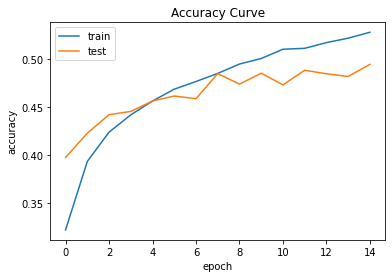

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

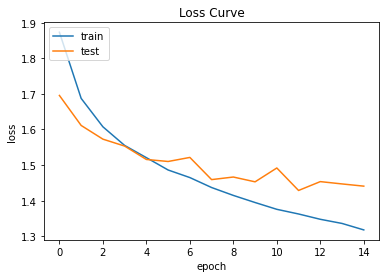

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
cifar10_model.save("cifar.cnn.h5")

In [46]:
cifar10_model.load_weights("cifar.cnn.h5")

In [47]:
loaded_model = tf.keras.models.load_model("cifar.cnn.h5")
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [48]:
!pip install pyngrok

In [49]:
!pip install streamlit

In [50]:
%%writefile app.py
import streamlit as st
import tensorflow.compat.v2 as tf
from PIL import Image , ImageOps
import cv2
import numpy as np
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():

 model = tf.keras.models.load_model('/content/cifar.cnn.h5')
 return model

model = lm()

st.write("""
# Cifar 10 Clasifier
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):
  
 size=(32,32)
 img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
 img = np.asarray(img)
 img = img[np.newaxis,...]
 l = np.argmax(model.predict(img))
 i = labels[l]
 return i

if file is None:
 st.text("Pls upload image")
else:
 image = Image.open(file)
 st.image(image,use_column_width=True)
 p = import_and_predict(image,model)
 st.success(str(p))

Overwriting app.py


In [51]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-09-01 15:30:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.206.15.164, 54.236.206.131, 52.205.91.57, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.206.15.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  12.8MB/s    in 1.0s    

2020-09-01 15:30:07 (12.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]



In [52]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [53]:
!./ngrok authtoken 1gucT1g3sK4pHqCpLdQbwzJErD6_51BwECtLjhE9GabADrfXW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [54]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [55]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

'http://dcc7a3813d69.ngrok.io'